Import Libraries

In [39]:
import numpy as np
import tensorflow.keras as keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.datasets import load_digits
from sklearn.utils import shuffle
from matplotlib import pyplot as plt
import tensorflow as tf
from keras.optimizer_v2.adam import Adam
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import gc

Check for GPU

In [2]:
# Check for TensorFlow GPU access
print(tf.config.list_physical_devices())

# See TensorFlow version
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.5.0


_____________
Import the data

In [3]:
X_Data = np.genfromtxt('txt_files/test_x_norm.txt', delimiter=",")
Y_Data_CON = np.genfromtxt('txt_files/test_y_continuous.txt', delimiter=",")
Y_Data_CLA = np.genfromtxt('txt_files/test_y_classification.txt', delimiter=",")

In [40]:
def create_k_fold_sets(arr, n=10):
    newarr = np.array_split(arr, n)
    splits = []
    for i in range(n):
        test_seg = newarr[i]
        if i == 0: 
            train_seg = newarr[1]
        else:
            train_seg = newarr[0]
        for j in range(n):
            if j == i:
                continue
            if not np.array_equal(train_seg, newarr[j]):
                train_seg = np.concatenate((train_seg, newarr[j]), axis=0)
        splits.append((train_seg, test_seg))
    return splits

In [5]:
x_sets = create_k_fold_sets(X_Data)
y_sets_con = create_k_fold_sets(Y_Data_CON)
y_sets_cla = create_k_fold_sets(Y_Data_CLA)

______________
Creating a Neural Network

In [6]:
def create_nn(learning_rate = 0.001, dropout_rate = None, regression = True):
    model = Sequential()
    model.add(Dense(1000, activation="relu", input_dim = 7))
    if dropout_rate is not None:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1000, activation="relu"))
    if dropout_rate is not None:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1000, activation="relu"))
    if dropout_rate is not None:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1000, activation="relu"))
    if dropout_rate is not None:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1000, activation="relu"))
    if dropout_rate is not None:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1000, activation="relu"))
    if dropout_rate is not None:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1000, activation="relu"))
    if dropout_rate is not None:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1000, activation="relu"))
    if dropout_rate is not None:
        model.add(Dropout(rate=dropout_rate))
    model.add(Dense(1000, activation="relu"))

    if regression is True:
        model.add(Dense(1, activation="linear"))
    else:
        model.add(Dense(5, activation="softmax"))

    optimizer = Adam(learning_rate = learning_rate)

    if regression is True:
        model.compile(optimizer=optimizer, loss= "mean_squared_error", metrics= ["MeanSquaredError"])
    else:
        model.compile(optimizer=optimizer, loss= "categorical_crossentropy", metrics= ["accuracy"])
        
    return model

__________
Create Sample Train and Test Sets

In [7]:
X_Train_01 = x_sets[0][0]
X_Test_01 = x_sets[0][1]

Y_Train_CON_01 = y_sets_con[0][0]
Y_Test_CON_01 = y_sets_con[0][1]

Y_Train_CLA_01 = y_sets_cla[0][0]
Y_Test_CLA_01 = y_sets_cla[0][1]

_____________
Grid Serach for Neural Networks

In [8]:
modes = [True, False]
epochss = [50, 100, 150]
learning_rates = [0.001, 0.002, 0.005]
dropout_rates = [None, 0.1, 0.2]
num_models = len(modes)*len(epochss)*len(learning_rates)*len(dropout_rates)

Metal device set to: Apple M1 Max

systemMemory: 32.00 GB
maxCacheSize: 10.67 GB



2022-04-28 19:54:27.123109: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-28 19:54:27.123291: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-04-28 19:54:27.881056: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-28 19:54:27.882979: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-28 19:54:34.233504: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.3633 - mean_squared_error: 1.3633

2022-04-28 20:00:43.159514: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.2753 - mean_squared_error: 1.2753
1/54 models trained!


2022-04-28 20:00:44.454308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.2506 - mean_squared_error: 1.2506

2022-04-28 20:06:52.270581: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.0518 - mean_squared_error: 1.0518
2/54 models trained!


2022-04-28 20:06:53.430004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.3231 - mean_squared_error: 1.3231

2022-04-28 20:13:02.973803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.0886 - mean_squared_error: 1.0886
3/54 models trained!


2022-04-28 20:13:03.988903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.6211 - mean_squared_error: 1.6211

2022-04-28 20:19:07.474407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 37ms/step - loss: 1.3911 - mean_squared_error: 1.3911
4/54 models trained!


2022-04-28 20:19:08.615993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.6901 - mean_squared_error: 1.6901

2022-04-28 20:25:15.682474: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.5095 - mean_squared_error: 1.5095
5/54 models trained!


2022-04-28 20:25:16.842026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.5265 - mean_squared_error: 1.5265

2022-04-28 20:31:26.012538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 37ms/step - loss: 1.3715 - mean_squared_error: 1.3715
6/54 models trained!


2022-04-28 20:31:27.051267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 34119444.0000 - mean_squared_error: 34119444.0000

2022-04-28 20:37:30.594449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 24987202.0000 - mean_squared_error: 24987202.0000
7/54 models trained!


2022-04-28 20:37:31.730392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2/7 [=======>......................] - ETA: 0s - loss: 37461.2266 - mean_squared_error: 37461.2266

2022-04-28 20:43:38.855481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 26623.2051 - mean_squared_error: 26623.2051
8/54 models trained!


2022-04-28 20:43:40.033996: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.7264 - mean_squared_error: 1.7264

2022-04-28 20:49:47.951182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 37ms/step - loss: 1.3761 - mean_squared_error: 1.3761
9/54 models trained!


2022-04-28 20:49:49.168765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.4180 - mean_squared_error: 1.4180

2022-04-28 21:01:55.978800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.4139 - mean_squared_error: 1.4139
10/54 models trained!


2022-04-28 21:01:57.112706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.2721 - mean_squared_error: 1.2721

2022-04-28 21:14:13.252576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 41ms/step - loss: 1.2468 - mean_squared_error: 1.2468
11/54 models trained!


2022-04-28 21:14:14.464748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.3938 - mean_squared_error: 1.3938

2022-04-28 21:26:29.614032: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 41ms/step - loss: 1.2262 - mean_squared_error: 1.2262
12/54 models trained!


2022-04-28 21:26:30.655646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.1583 - mean_squared_error: 1.1583

2022-04-28 21:38:39.208497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 37ms/step - loss: 1.1055 - mean_squared_error: 1.1055
13/54 models trained!


2022-04-28 21:38:40.352062: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.3911 - mean_squared_error: 1.3911

2022-04-28 21:50:53.871636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 37ms/step - loss: 1.2117 - mean_squared_error: 1.2117
14/54 models trained!


2022-04-28 21:50:55.034697: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.2030 - mean_squared_error: 1.2030

2022-04-28 22:03:12.214865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.0703 - mean_squared_error: 1.0703
15/54 models trained!


2022-04-28 22:03:13.230752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 0.9804 - mean_squared_error: 0.9804

2022-04-28 22:15:20.301265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.0651 - mean_squared_error: 1.0651
16/54 models trained!


2022-04-28 22:15:21.443288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 8.6265 - mean_squared_error: 8.6265  

2022-04-28 22:27:34.897811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 7.5881 - mean_squared_error: 7.5881
17/54 models trained!


2022-04-28 22:27:36.065035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.7537 - mean_squared_error: 1.7537

2022-04-28 22:39:49.931737: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.4433 - mean_squared_error: 1.4433
18/54 models trained!


2022-04-28 22:39:51.036738: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.5402 - mean_squared_error: 1.5402

2022-04-28 22:58:00.884981: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.5884 - mean_squared_error: 1.5884
19/54 models trained!


2022-04-28 22:58:02.041485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.3004 - mean_squared_error: 1.3004

2022-04-28 23:16:25.881076: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 1.2076 - mean_squared_error: 1.2076
20/54 models trained!


2022-04-28 23:16:27.053717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.1270 - mean_squared_error: 1.1270

2022-04-28 23:34:51.100297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.0983 - mean_squared_error: 1.0983
21/54 models trained!


2022-04-28 23:34:52.120267: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8875 - mean_squared_error: 1.8875

2022-04-28 23:53:02.155132: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 37ms/step - loss: 1.9763 - mean_squared_error: 1.9763
22/54 models trained!


2022-04-28 23:53:03.300111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 3.0381 - mean_squared_error: 3.0381

2022-04-29 00:11:23.881472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 2.6140 - mean_squared_error: 2.6140
23/54 models trained!


2022-04-29 00:11:25.054836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.6999 - mean_squared_error: 1.6999

2022-04-29 00:29:45.224767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.4372 - mean_squared_error: 1.4372
24/54 models trained!


2022-04-29 00:29:46.242010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 4.1821 - mean_squared_error: 4.1821

2022-04-29 00:47:57.003388: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 4.4609 - mean_squared_error: 4.4609
25/54 models trained!


2022-04-29 00:47:58.157254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.6767 - mean_squared_error: 1.6767

2022-04-29 01:06:23.525521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 1.4622 - mean_squared_error: 1.4622
26/54 models trained!


2022-04-29 01:06:24.690476: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 57.4863 - mean_squared_error: 57.4863

2022-04-29 01:24:46.015453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 38ms/step - loss: 54.8183 - mean_squared_error: 54.8183
27/54 models trained!


2022-04-29 01:24:47.171208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.7901 - accuracy: 0.2188

2022-04-29 01:30:51.705644: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 1.5909 - accuracy: 0.2800
28/54 models trained!


2022-04-29 01:30:52.881568: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.9037 - accuracy: 0.2188

2022-04-29 01:36:58.130152: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.7474 - accuracy: 0.2550
29/54 models trained!


2022-04-29 01:36:59.308731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.7459 - accuracy: 0.1875

2022-04-29 01:43:05.777203: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.6052 - accuracy: 0.2300
30/54 models trained!


2022-04-29 01:43:06.830037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.4880 - accuracy: 0.3229

2022-04-29 01:49:11.556098: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 41ms/step - loss: 1.4695 - accuracy: 0.3400
31/54 models trained!


2022-04-29 01:49:12.740465: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.7318 - accuracy: 0.2500

2022-04-29 01:55:18.455413: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.6303 - accuracy: 0.2550
32/54 models trained!


2022-04-29 01:55:19.655692: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8307 - accuracy: 0.2500

2022-04-29 02:01:25.228866: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.6711 - accuracy: 0.2700
33/54 models trained!


2022-04-29 02:01:26.267807: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8074 - accuracy: 0.2188

2022-04-29 02:07:30.477043: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.7021 - accuracy: 0.2500
34/54 models trained!


2022-04-29 02:07:31.648711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.7727 - accuracy: 0.2188

2022-04-29 02:13:36.407244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.6745 - accuracy: 0.2500
35/54 models trained!


2022-04-29 02:13:37.584821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8110 - accuracy: 0.2188

2022-04-29 02:19:43.406823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 1.7060 - accuracy: 0.2500
36/54 models trained!


2022-04-29 02:19:44.531106: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 2.1907 - accuracy: 0.3229

2022-04-29 02:32:12.484341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 2.0614 - accuracy: 0.3400
37/54 models trained!


2022-04-29 02:32:13.715065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.4820 - accuracy: 0.3125

2022-04-29 02:45:01.775073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 1.5471 - accuracy: 0.3200
38/54 models trained!


2022-04-29 02:45:03.047387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.6558 - accuracy: 0.2812

2022-04-29 02:57:52.638182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 39ms/step - loss: 1.5551 - accuracy: 0.3300
39/54 models trained!


2022-04-29 02:57:53.711157: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 2.7295 - accuracy: 0.2188

2022-04-29 03:10:40.994263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 41ms/step - loss: 2.3200 - accuracy: 0.2500
40/54 models trained!


2022-04-29 03:10:42.251801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.6311 - accuracy: 0.2812

2022-04-29 03:23:32.029113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 1.5973 - accuracy: 0.2750
41/54 models trained!


2022-04-29 03:23:33.320535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.6930 - accuracy: 0.2604

2022-04-29 03:36:23.690303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.5469 - accuracy: 0.2900
42/54 models trained!


2022-04-29 03:36:24.742082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8639 - accuracy: 0.2188

2022-04-29 03:49:12.425554: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 42ms/step - loss: 1.7505 - accuracy: 0.2500
43/54 models trained!


2022-04-29 03:49:13.639371: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8119 - accuracy: 0.2188

2022-04-29 04:02:03.726746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 1.7066 - accuracy: 0.2500
44/54 models trained!


2022-04-29 04:02:04.932873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8076 - accuracy: 0.2188

2022-04-29 04:14:53.288978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 1.7029 - accuracy: 0.2500
45/54 models trained!


2022-04-29 04:14:54.423093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 3.4766 - accuracy: 0.3438

2022-04-29 04:34:03.763120: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 41ms/step - loss: 3.4343 - accuracy: 0.3300
46/54 models trained!


2022-04-29 04:34:04.963851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.5847 - accuracy: 0.3542

2022-04-29 04:53:16.967743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 41ms/step - loss: 1.6773 - accuracy: 0.3500
47/54 models trained!


2022-04-29 04:53:18.263875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.9139 - accuracy: 0.3125

2022-04-29 05:12:30.994320: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 40ms/step - loss: 1.8214 - accuracy: 0.3450
48/54 models trained!


2022-04-29 05:12:32.061224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.5756 - accuracy: 0.3229

2022-04-29 05:31:42.516952: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 41ms/step - loss: 1.6826 - accuracy: 0.3550
49/54 models trained!


2022-04-29 05:31:43.725519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8071 - accuracy: 0.3438

2022-04-29 05:51:01.048035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 42ms/step - loss: 1.6903 - accuracy: 0.3350
50/54 models trained!


2022-04-29 05:51:02.278462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.6639 - accuracy: 0.3021

2022-04-29 06:10:16.284826: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 40ms/step - loss: 1.6853 - accuracy: 0.3150
51/54 models trained!


2022-04-29 06:10:17.353070: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.7883 - accuracy: 0.2188

2022-04-29 06:28:59.462659: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 40ms/step - loss: 1.6870 - accuracy: 0.2500
52/54 models trained!


2022-04-29 06:29:00.658186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8007 - accuracy: 0.2188

2022-04-29 06:47:15.720811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.6972 - accuracy: 0.2500
53/54 models trained!


2022-04-29 06:47:16.908205: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


3/7 [===========>..................] - ETA: 0s - loss: 1.8103 - accuracy: 0.2188

2022-04-29 07:05:33.483850: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 0s 39ms/step - loss: 1.7050 - accuracy: 0.2500
54/54 models trained!
Best regresson model - Epochs: 50, lr: 0.005, dropout: None | Test Accuracy: 24987202.0
Best classifiction model - Epochs: 150, lr: 0.002, dropout: None | Test Accuracy: 0.35499998927116394
All Done!


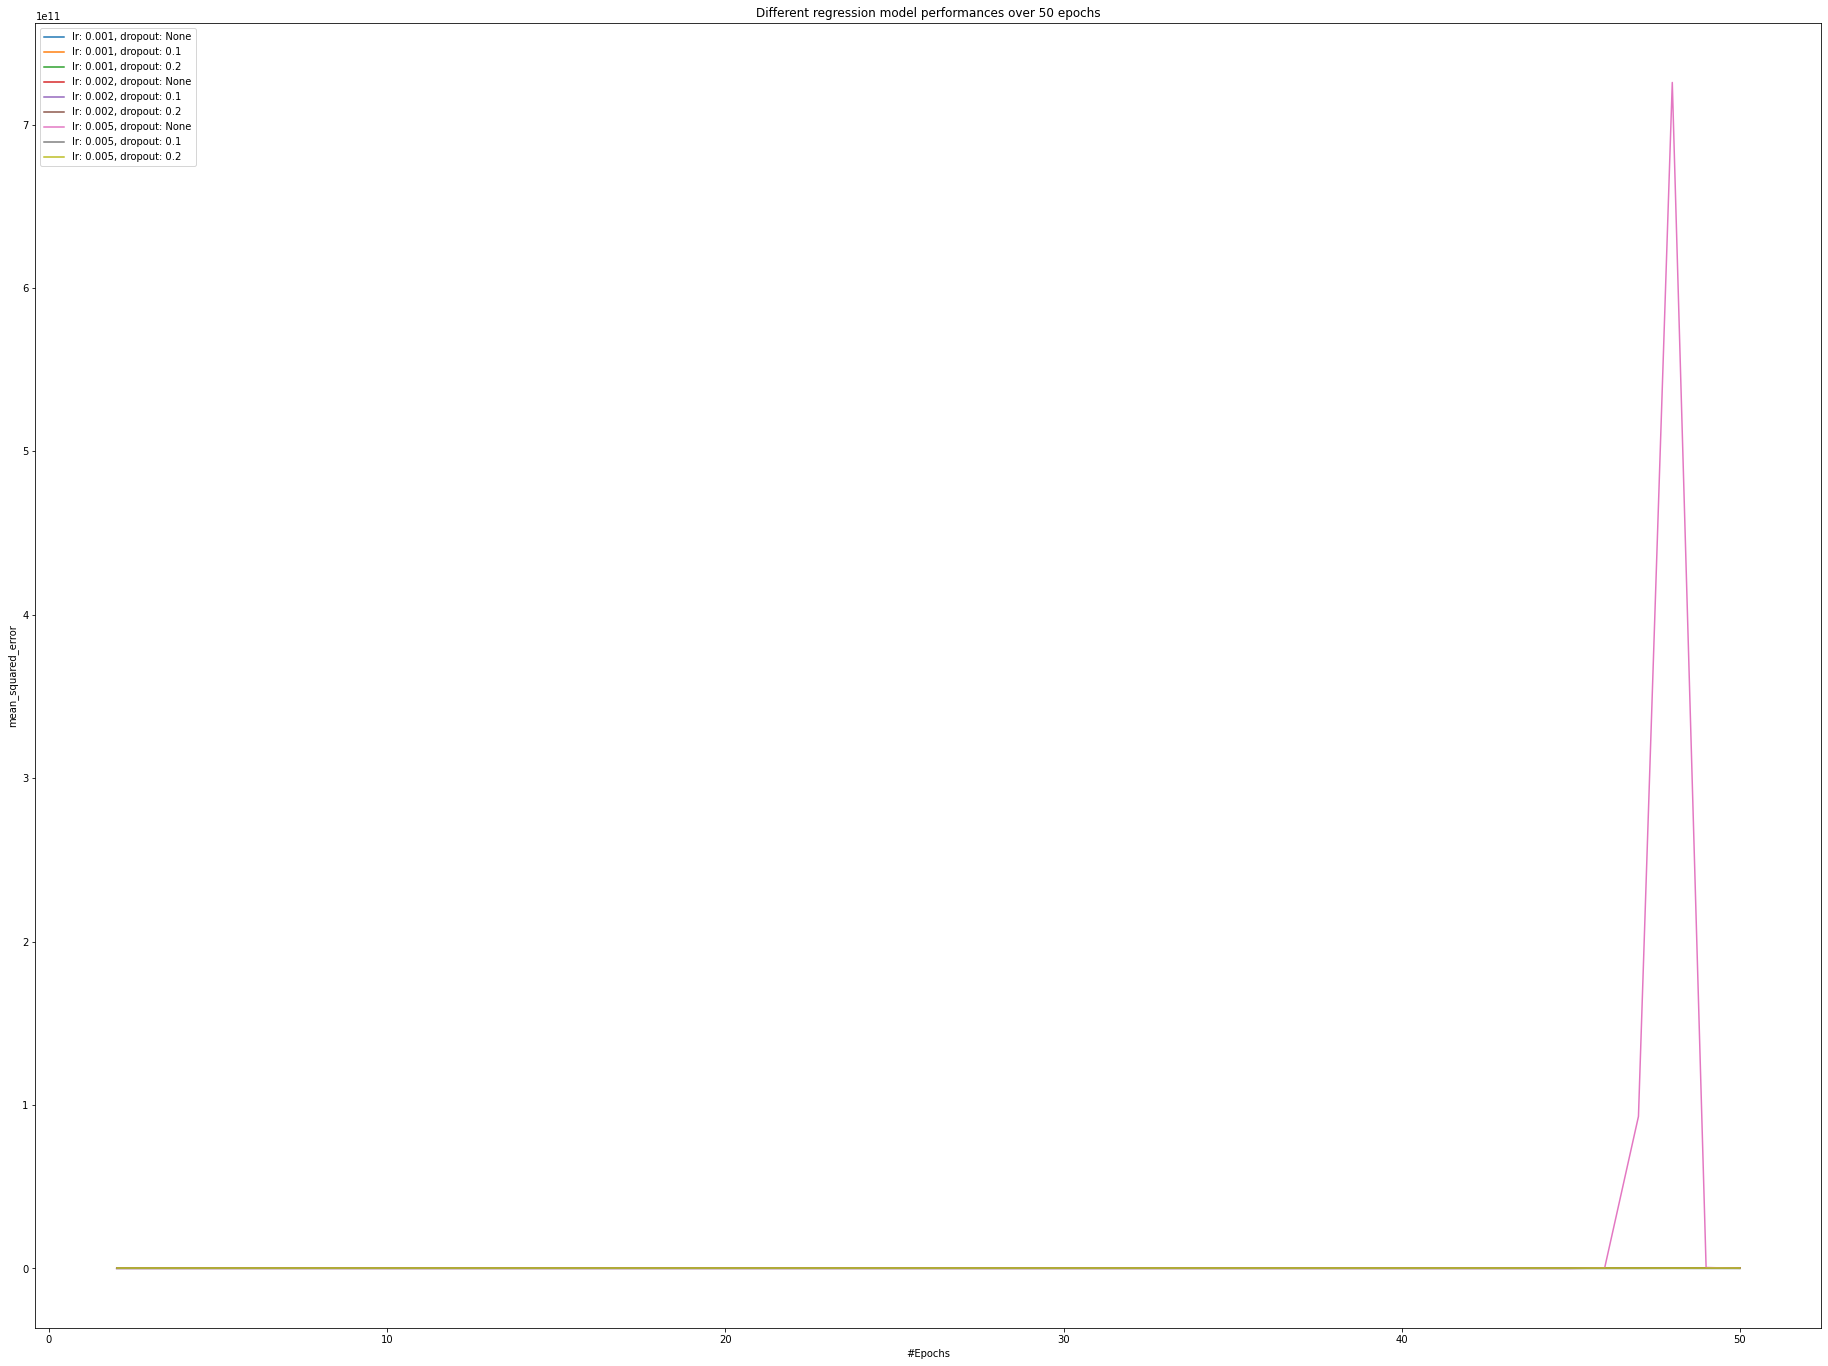

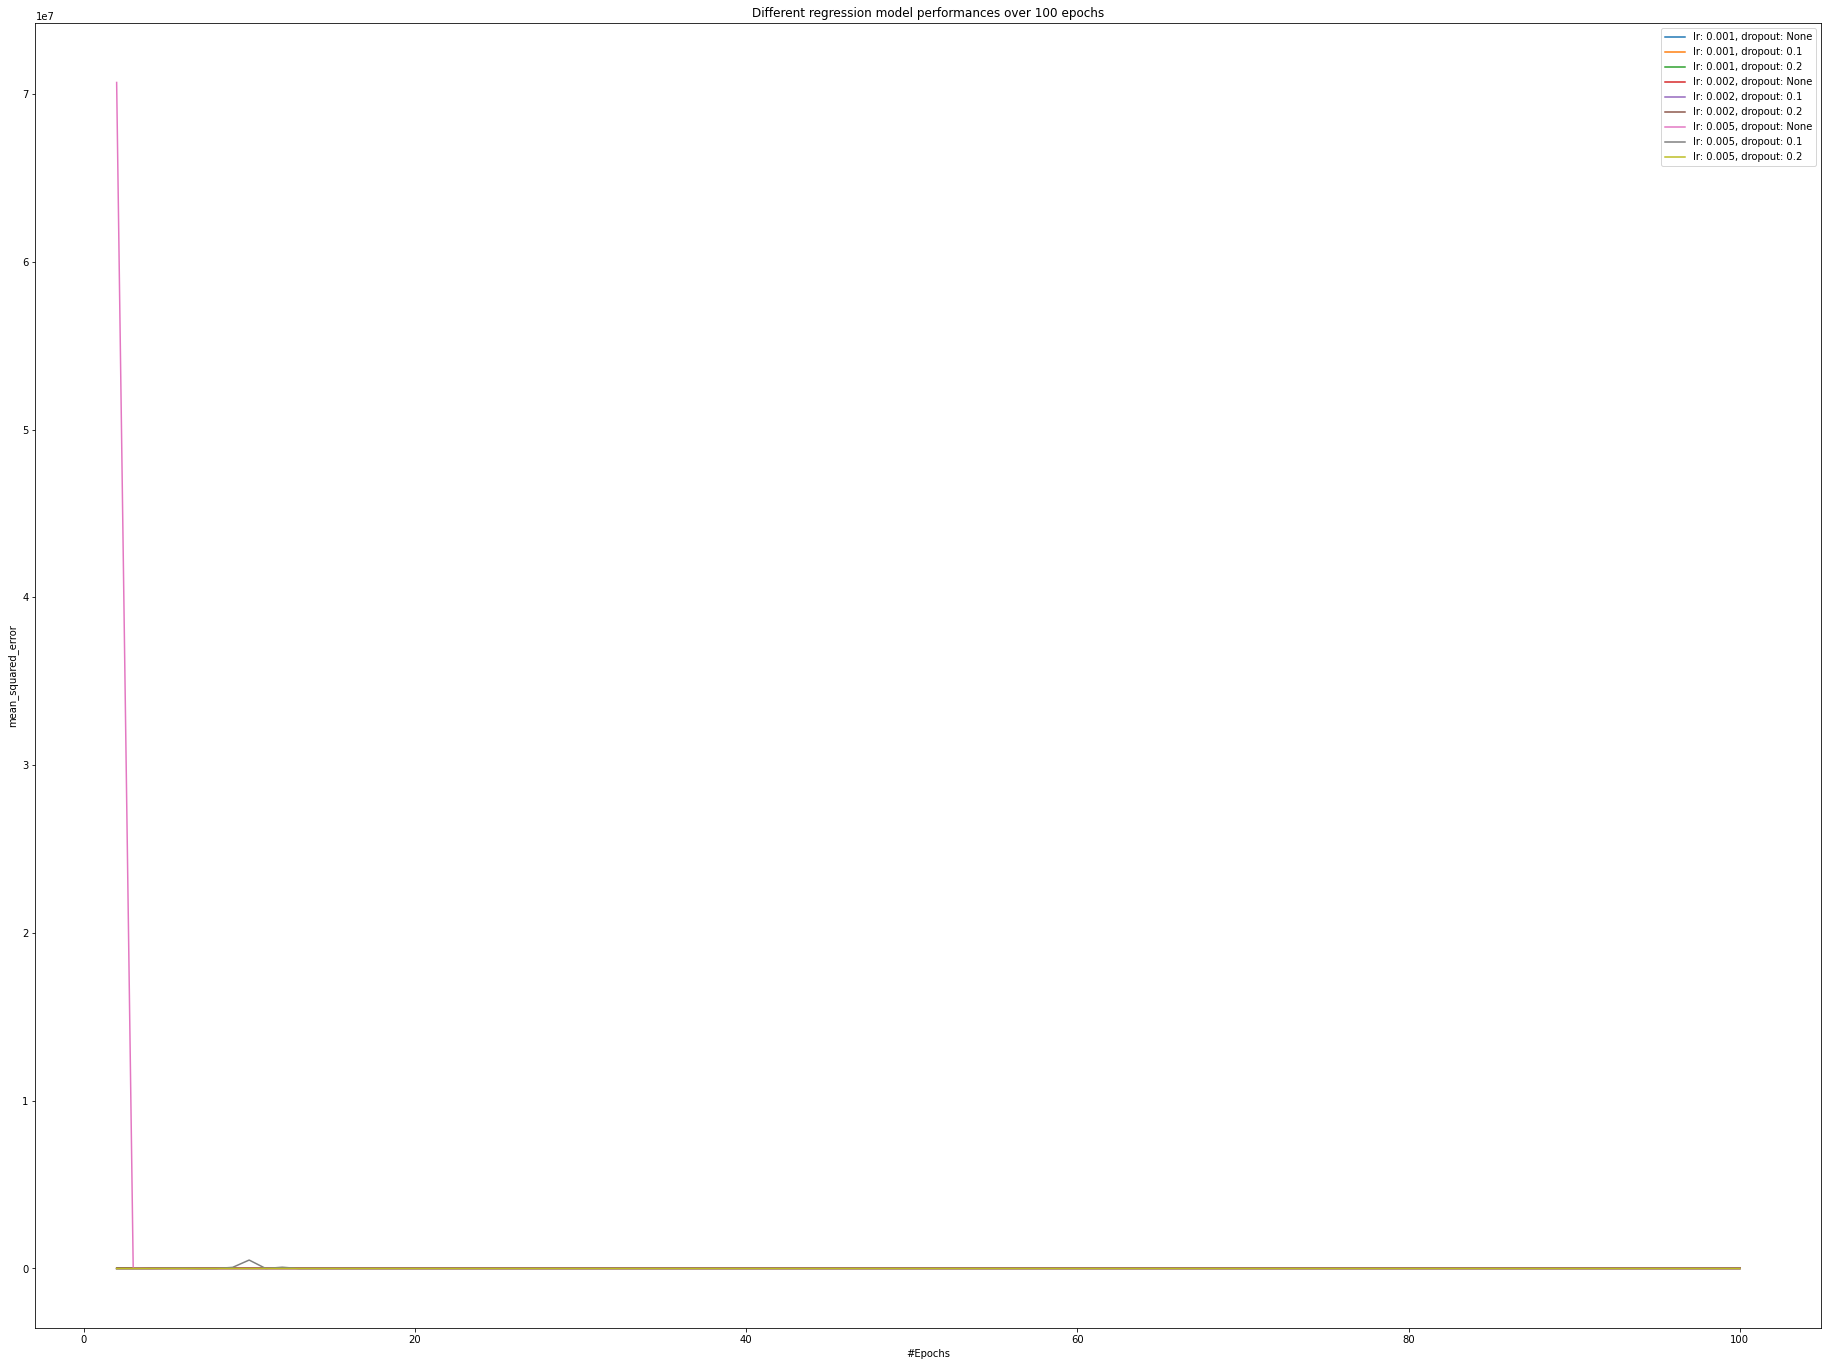

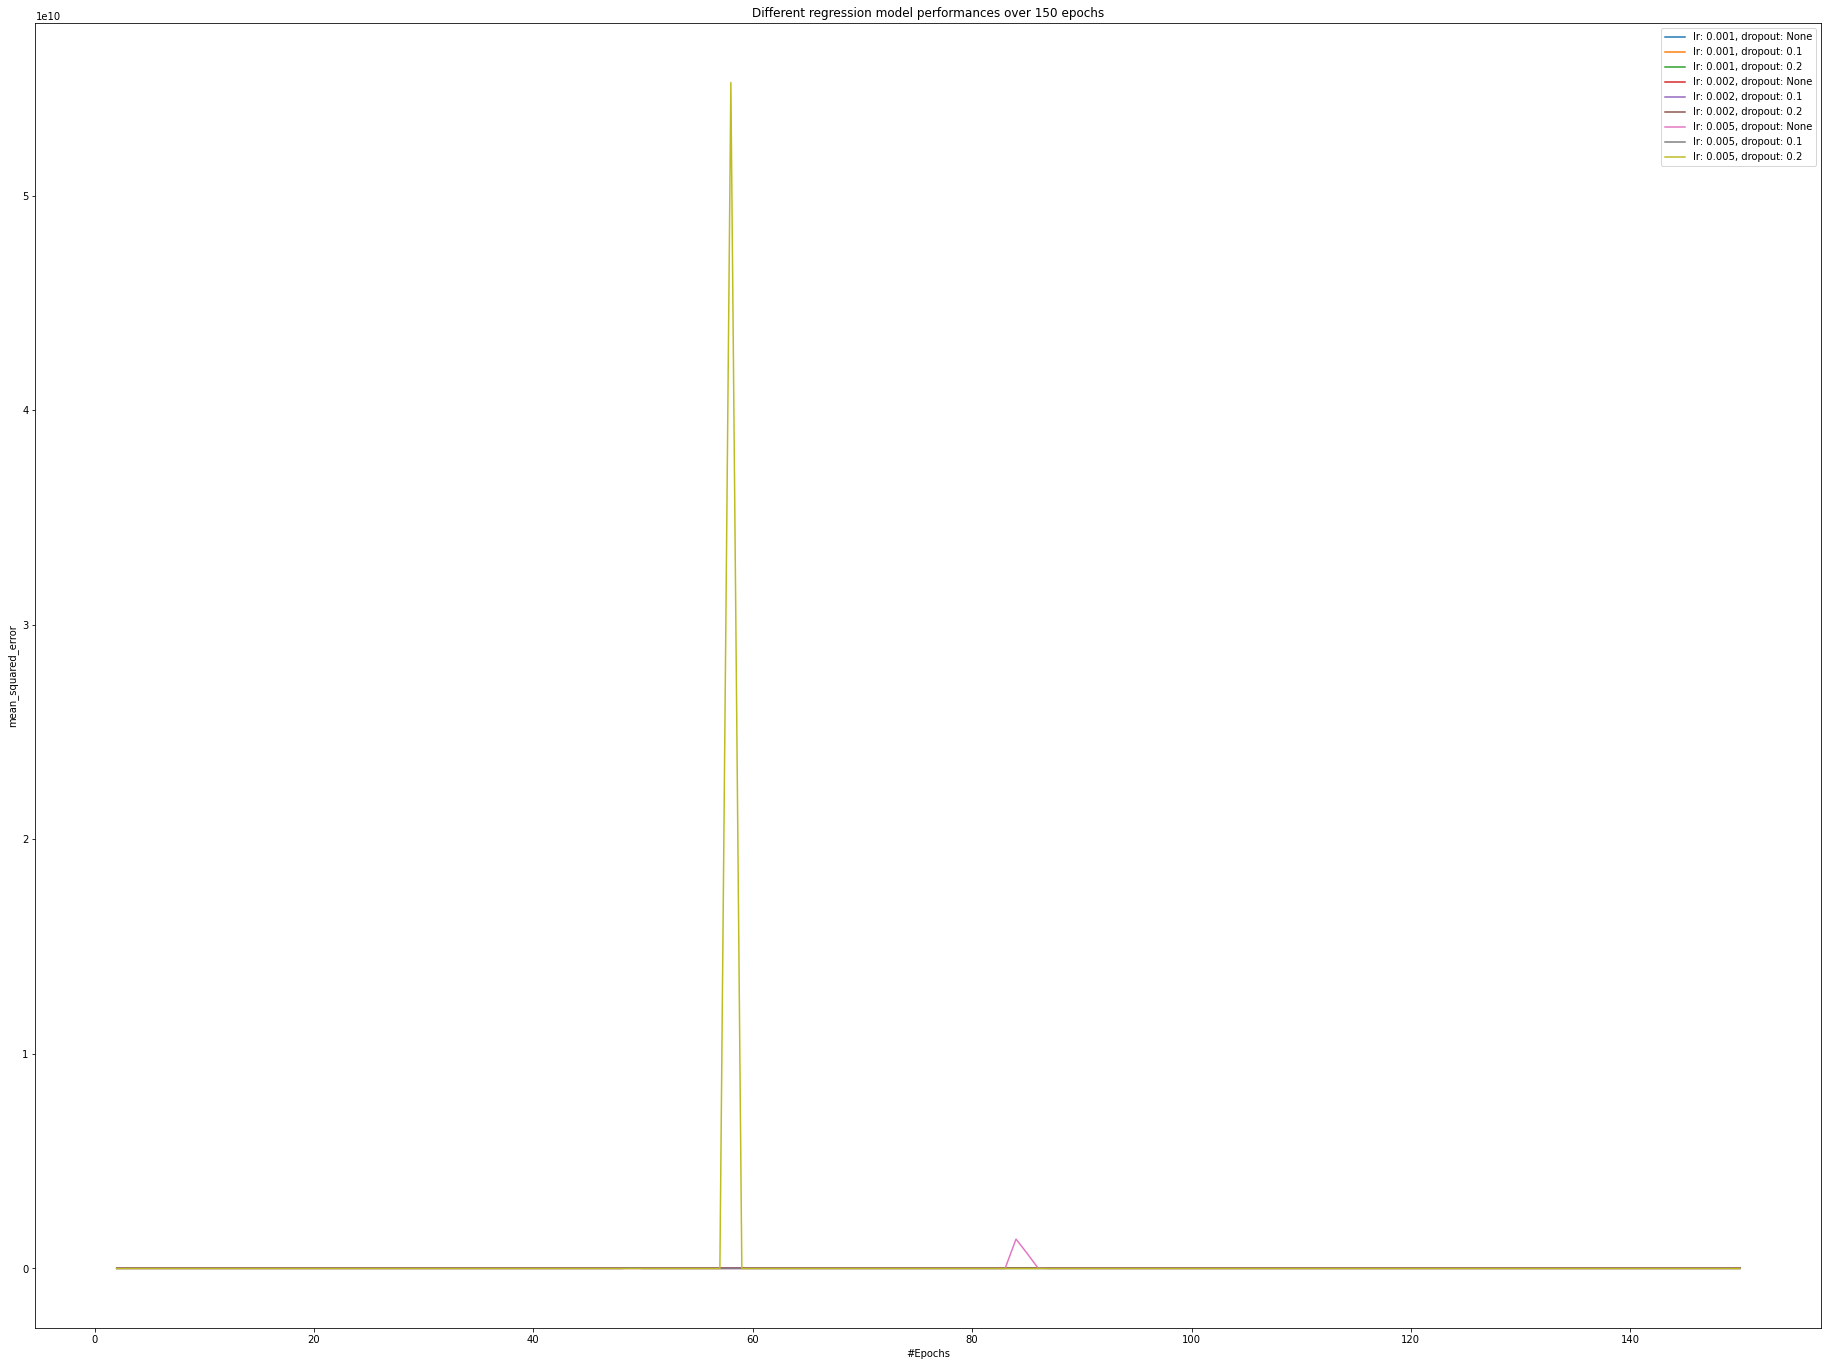

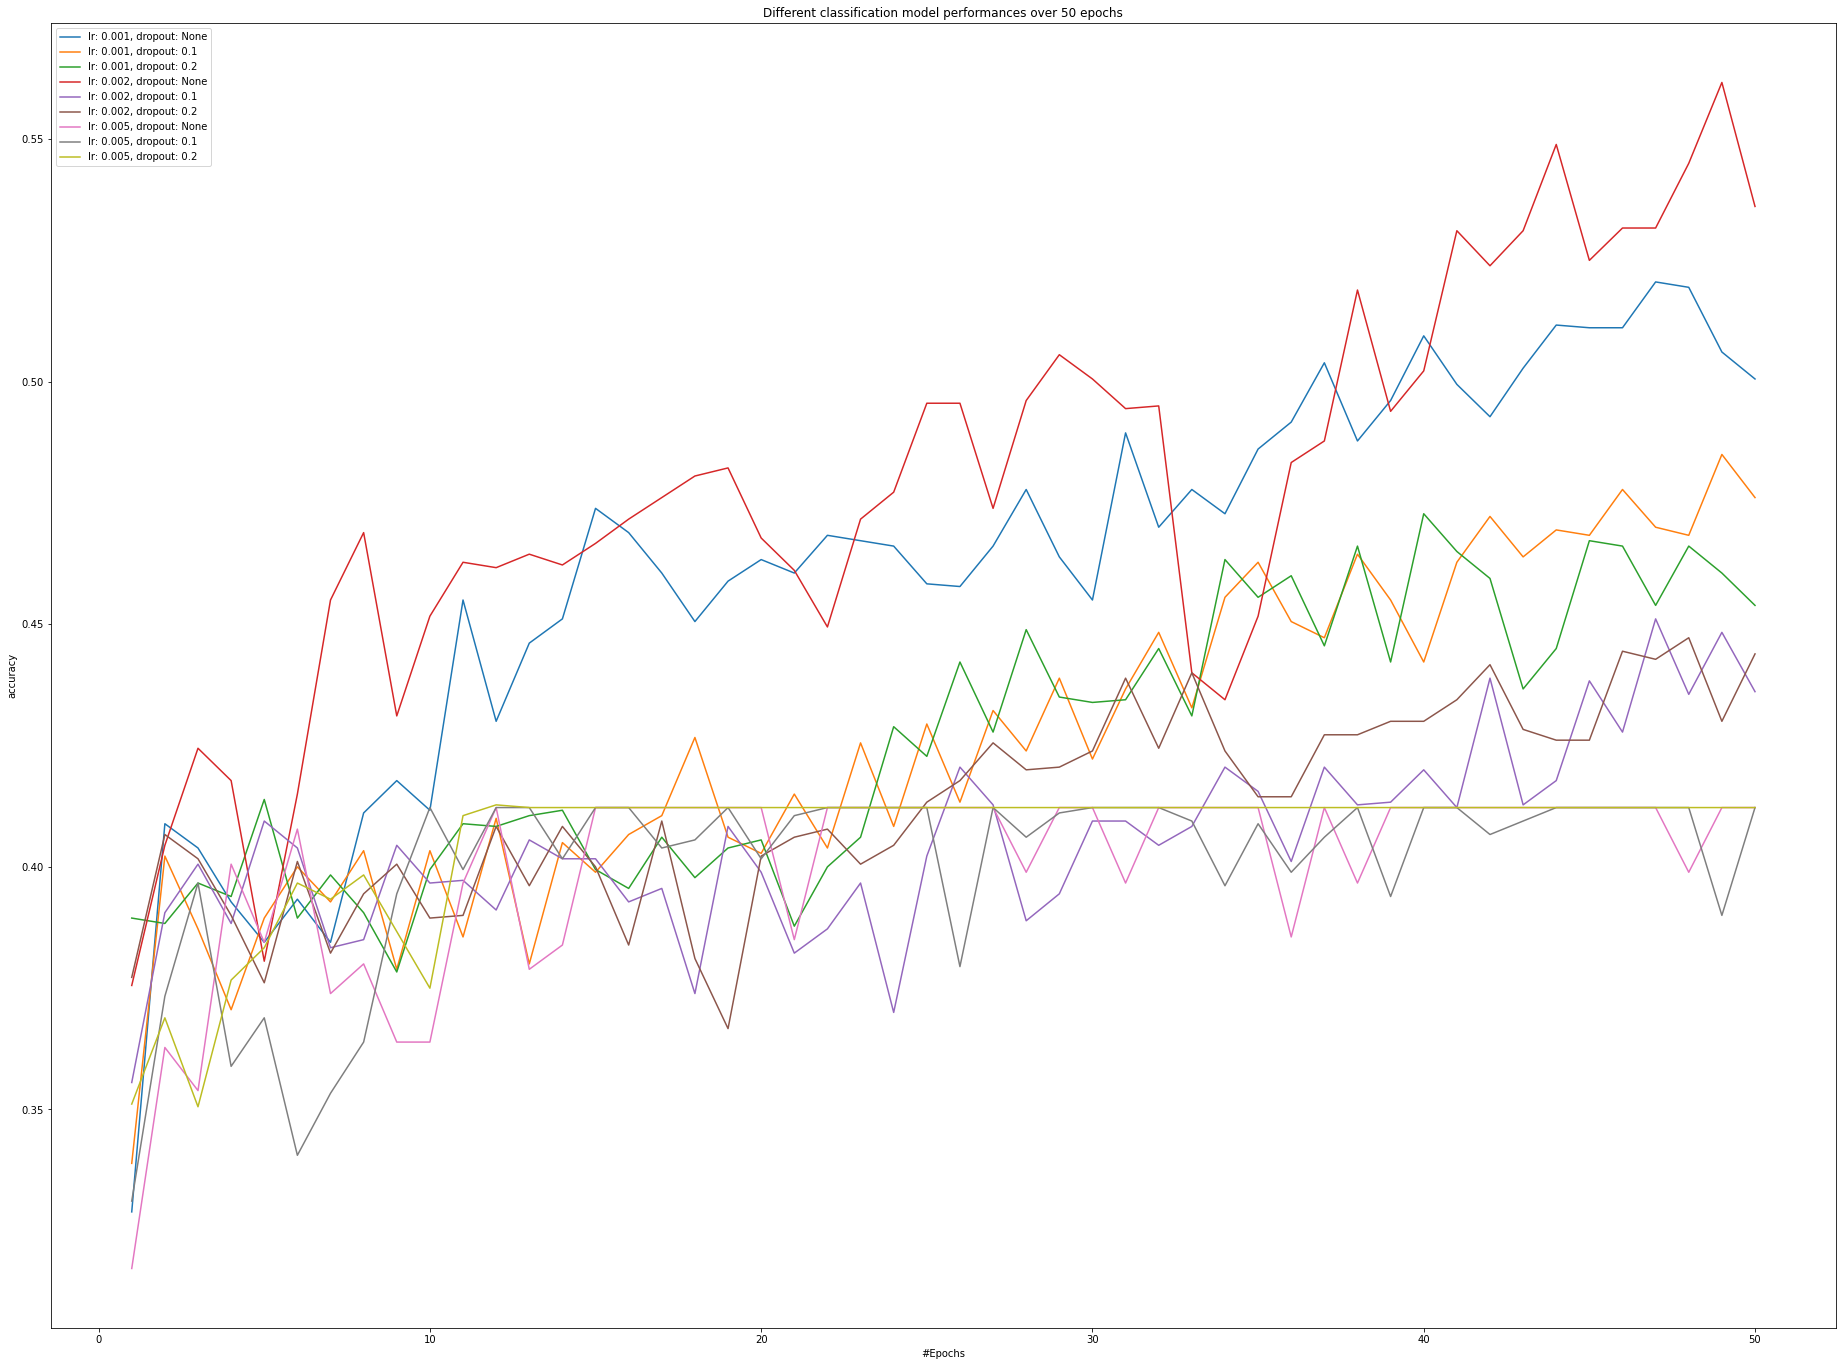

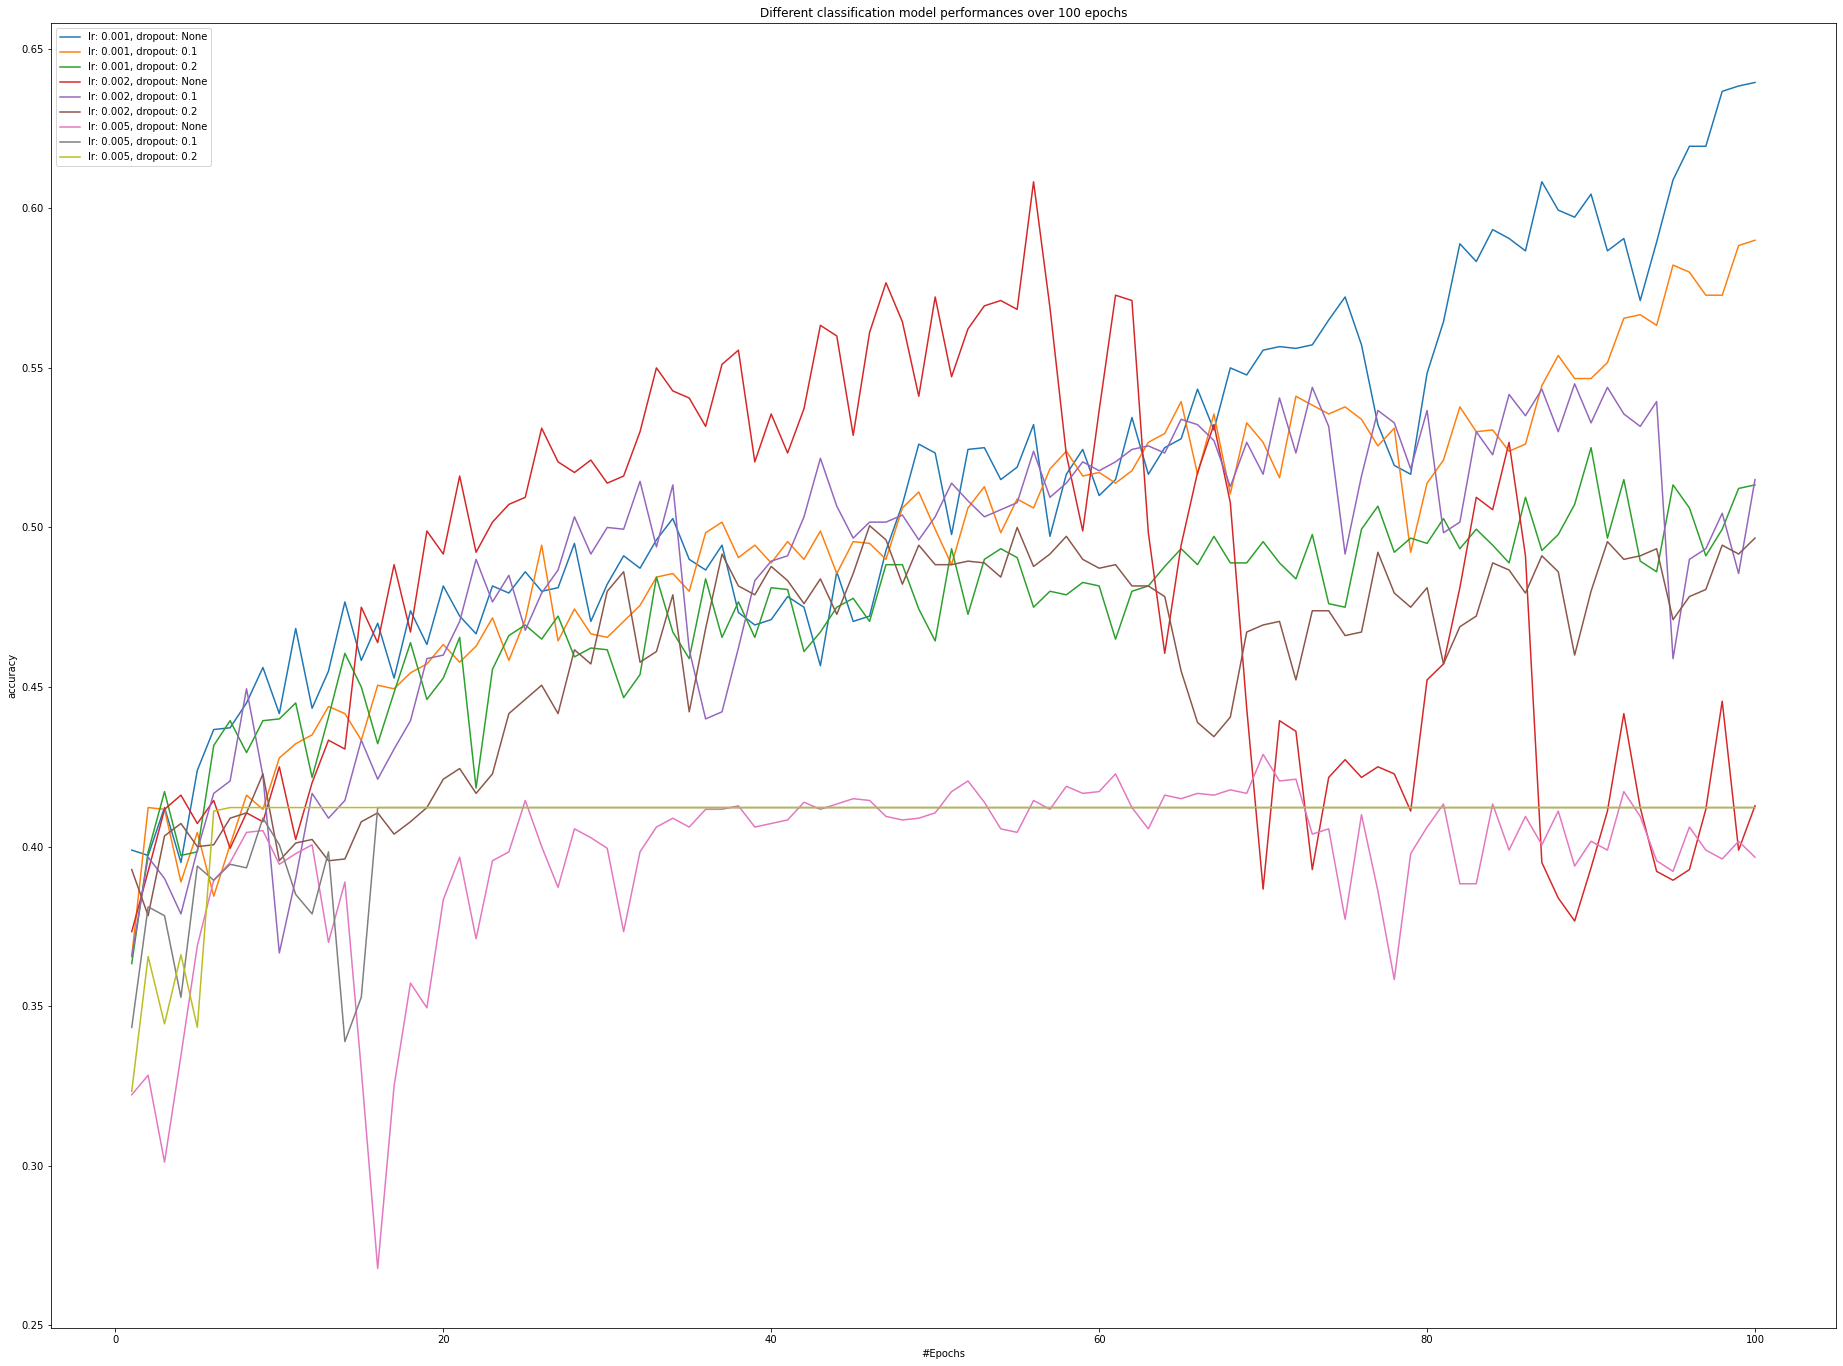

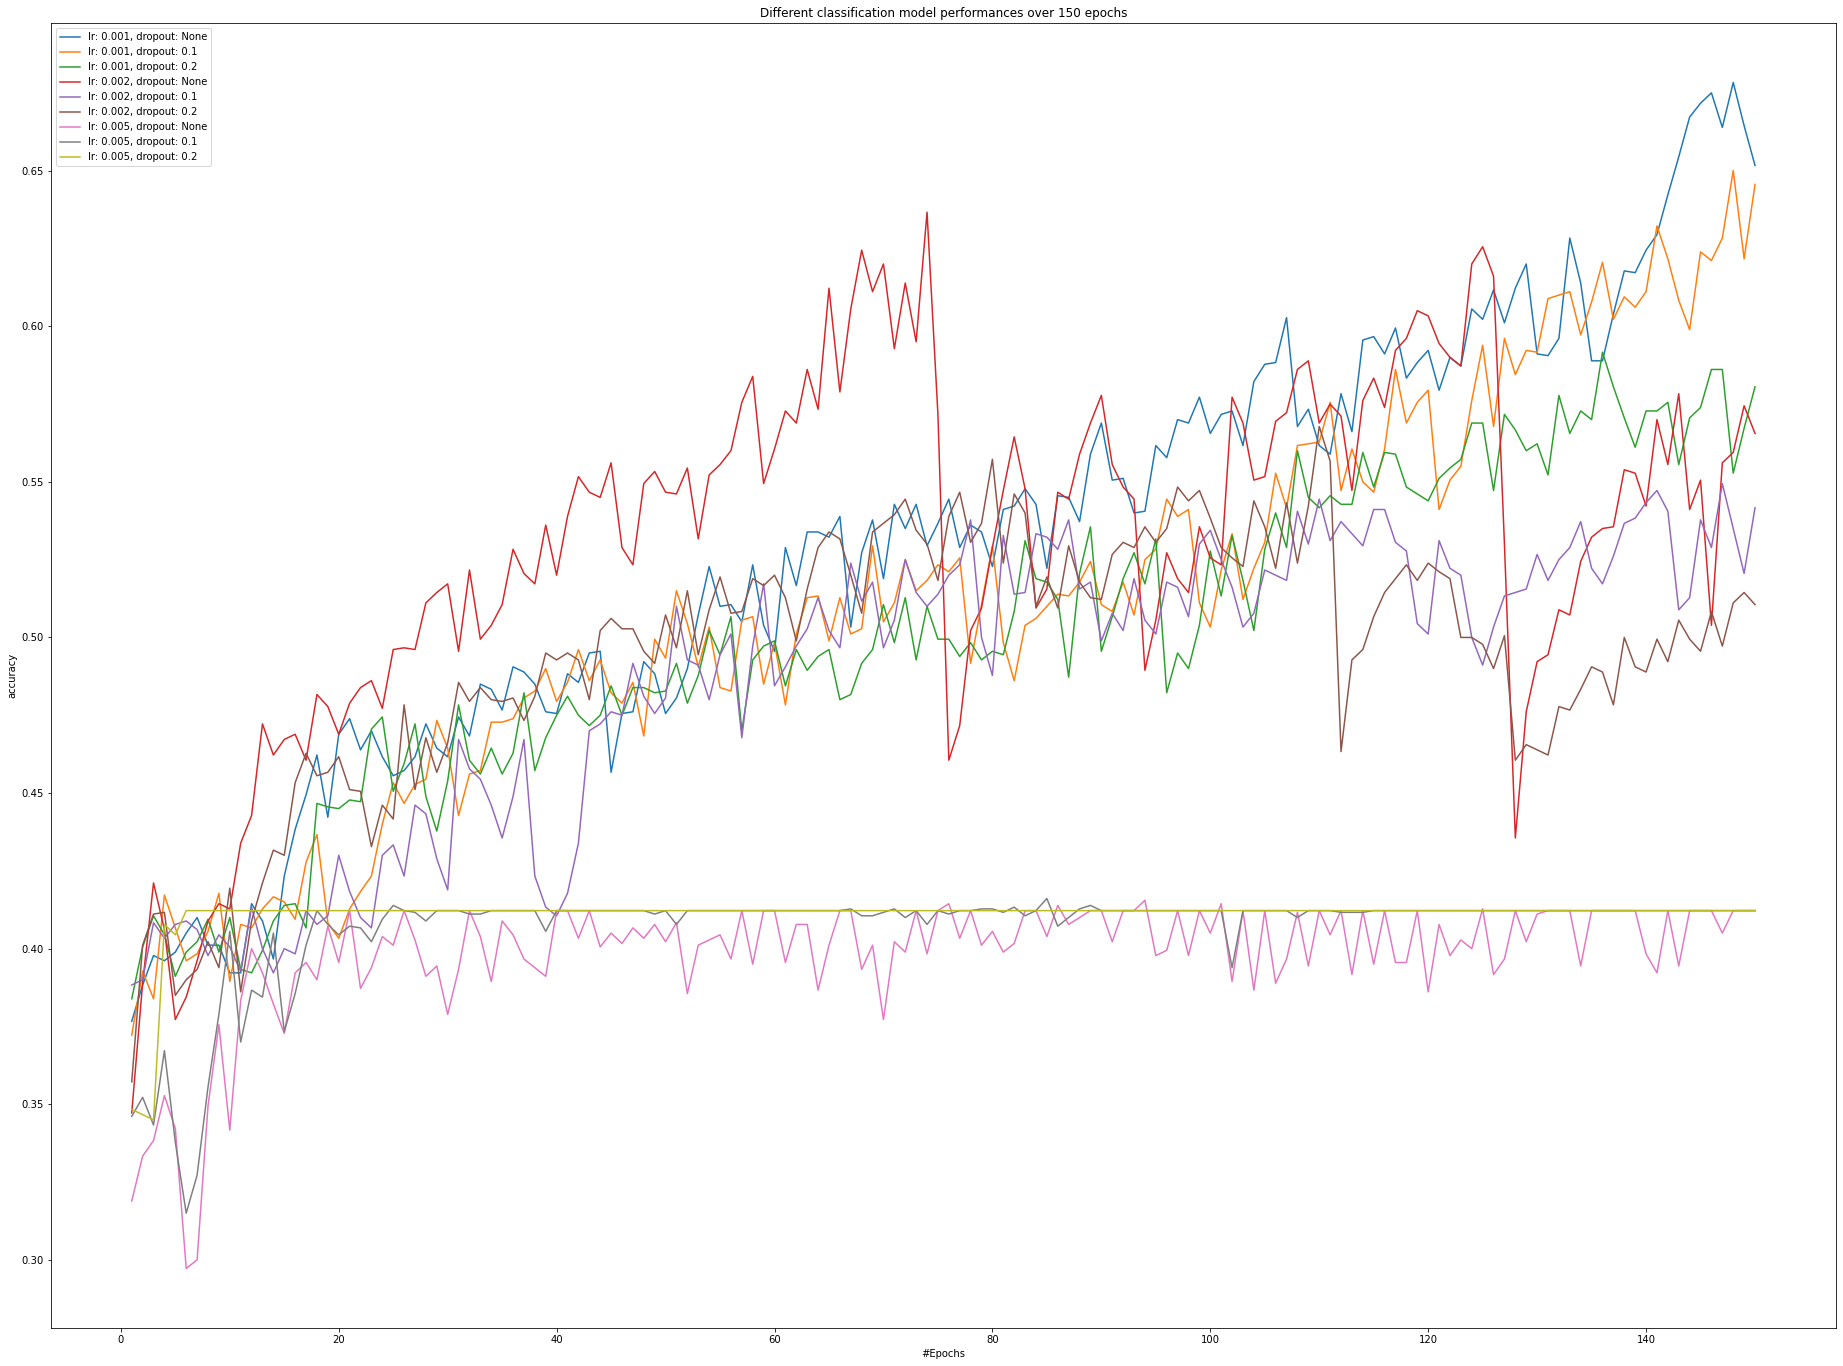

In [9]:
w0 = open("graphs/model_performances.txt", "a")
count = 0
best_test_acc_con = -100
best_test_acc_cla = -100
best_epochs_con = None
best_lr_con = None
best_dropout_con = None
best_epochs_cla = None
best_lr_cla = None
best_dropout_cla = None

for mode in modes:
    for epochs in epochss:

        plt.figure(figsize=(32, 24))

        if mode is True:
            model_type = "regression"
            i = list(range(2, epochs + 1))
            plt.ylabel("mean_squared_error")
            Y_Train_01 = Y_Train_CON_01
            Y_Test_01 = Y_Test_CON_01
        else:
            model_type = "classification"
            i = list(range(1, epochs + 1))
            plt.ylabel("accuracy")
            Y_Train_01 = Y_Train_CLA_01
            Y_Test_01 = Y_Test_CLA_01

        plt.xlabel("#Epochs")
        plt.title(f"Different {model_type} model performances over {epochs} epochs")
        
        for learning_rate in learning_rates:
            for dropout_rate in dropout_rates:

                model = create_nn(learning_rate, dropout_rate, mode)

                with tf.device('/device:GPU:0'):
                    trained_model = model.fit(X_Train_01, Y_Train_01, batch_size=50, epochs=epochs, verbose=0, validation_split=0.0)

                test_acc = model.evaluate(X_Test_01, Y_Test_01)[1]

                if mode is True:
                    train_acc = trained_model.history['mean_squared_error'][-1]
                    if test_acc > best_test_acc_con:
                        best_test_acc_con = test_acc
                        best_epochs_con = epochs
                        best_lr_con = learning_rate
                        best_dropout_con = dropout_rate
                    plt.plot(i, trained_model.history['mean_squared_error'][1:], label = f'lr: {learning_rate}, dropout: {dropout_rate}')
                else:
                    train_acc = trained_model.history['accuracy'][-1]
                    if test_acc > best_test_acc_cla:
                        best_test_acc_cla = test_acc
                        best_epochs_cla = epochs
                        best_lr_cla = learning_rate
                        best_dropout_cla = dropout_rate
                    plt.plot(i, trained_model.history['accuracy'], label = f'lr: {learning_rate}, dropout: {dropout_rate}')
                
                w0.write(f'Model Specs - Type: {model_type}, Epochs: {epochs}, lr: {learning_rate}, dropout: {dropout_rate} | Final Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')
                w0.write('\n')

                del model
                del trained_model
                gc.collect()
                keras.backend.clear_session()

                count = count + 1
                print(f'{count}/{num_models} models trained!')
        
        plt.legend()
        plt.savefig(f'graphs/Different_{model_type}_models_over_{epochs}_epochs.pdf')

print(f"Best regresson model - Epochs: {best_epochs_con}, lr: {best_lr_con}, dropout: {best_dropout_con} | Test Accuracy: {best_test_acc_con}")
print(f"Best classifiction model - Epochs: {best_epochs_cla}, lr: {best_lr_cla}, dropout: {best_dropout_cla} | Test Accuracy: {best_test_acc_cla}")  
w0.write(f"Best regresson model - Epochs: {best_epochs_con}, lr: {best_lr_con}, dropout: {best_dropout_con} | Test Accuracy: {best_test_acc_con}") 
w0.write(f"Best classifiction model - Epochs: {best_epochs_cla}, lr: {best_lr_cla}, dropout: {best_dropout_cla} | Test Accuracy: {best_test_acc_cla}")    
w0.close() 
print("All Done!")          

_______________
Grid Search for Random Forests

In [41]:
X_Data = np.genfromtxt('txt_files/test_x.txt', delimiter=",")
x_sets = create_k_fold_sets(X_Data)
X_Train_01 = x_sets[0][0]
X_Test_01 = x_sets[0][1]

Y_Data_CLA = np.genfromtxt('txt_files/test_y_classification_2.txt', delimiter=",")
y_sets_cla = create_k_fold_sets(Y_Data_CLA)
Y_Train_CLA_01 = y_sets_cla[0][0]
Y_Test_CLA_01 = y_sets_cla[0][1]

Y_Data_CON = np.genfromtxt('txt_files/test_y_continuous.txt', delimiter=",")
y_sets_con = create_k_fold_sets(Y_Data_CLA)
Y_Train_CON_01 = y_sets_con[0][0]
Y_Test_CON_01 = y_sets_con[0][1]

In [27]:
randomForestClassifier = RandomForestClassifier(n_estimators=10, max_depth=50)
randomForestClassifier.fit(X_Train_01, Y_Train_CLA_01)
train_acc = randomForestClassifier.score(X_Train_01, Y_Train_CLA_01)
test_acc = randomForestClassifier.score(X_Test_01, Y_Test_CLA_01)
print(train_acc)
print(test_acc)

0.9827777777777778
0.25


In [47]:
num_estimatorss = [10, 20, 40]
max_depths = [5, 10, 20]

In [38]:
w0 = open("graphs/model_performances2.txt", "a")
best_test_acc = -100
best_max_depth = None
best_num_estimators = None
for max_depth in max_depths:
    for num_estimators in num_estimatorss:
        randomForestClassifier = RandomForestClassifier(n_estimators=num_estimators, max_depth=max_depth)
        randomForestClassifier.fit(X_Train_01, Y_Train_CLA_01)
        train_acc = randomForestClassifier.score(X_Train_01, Y_Train_CLA_01)
        test_acc = randomForestClassifier.score(X_Test_01, Y_Test_CLA_01)
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_max_depth = max_depth
            best_num_estimators = num_estimators
        w0.write(f'Model Specs - Type: classification forest, #Trees: {num_estimators}, max depth: {max_depth} | Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')
        w0.write('\n')
        del randomForestClassifier

print(f"Best Classification Forest Specs: #Trees: {best_num_estimators}, max depth: {best_max_depth} | Test Accuracy: {best_test_acc}")
w0.close()
print("All Done!")

Best Classification Forest Specs: #Trees: 40, max depth: 20 | Test Accuracy: 0.335
All Done!


In [48]:
w0 = open("graphs/model_performances2.txt", "a")
best_test_acc = -100
best_max_depth = None
best_num_estimators = None
for max_depth in max_depths:
    for num_estimators in num_estimatorss:
        randomForestRegressor = RandomForestRegressor(n_estimators=num_estimators, max_depth=max_depth)
        randomForestRegressor.fit(X_Train_01, Y_Train_CON_01)
        train_acc = randomForestRegressor.score(X_Train_01, Y_Train_CON_01)
        test_acc = randomForestRegressor.score(X_Test_01, Y_Test_CON_01)
        if test_acc > best_test_acc:
            best_test_acc = test_acc
            best_max_depth = max_depth
            best_num_estimators = num_estimators
        w0.write(f'Model Specs - Type: regression forest, #Trees: {num_estimators}, max depth: {max_depth} | Train Accuracy: {train_acc}, Test Accuracy: {test_acc}')
        w0.write('\n')
        del randomForestRegressor

print(f"Best Regression Forest Specs: #Trees: {best_num_estimators}, max depth: {best_max_depth} | Test Accuracy: {best_test_acc}")
w0.close()
print("All Done!")

Best Regression Forest Specs: #Trees: 40, max depth: 20 | Test Accuracy: -0.1843396433014437
All Done!
